In [34]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from scipy import interpolate
from sklearn.preprocessing import MinMaxScaler

#### 1. Data import

In [35]:
# group 1 datas
sensor1 = pd.read_csv('raw_data/g1_sensor1.csv', names = ['time', 'normal', 'type1', 'type2', 'type3'])
sensor2 = pd.read_csv('raw_data/g1_sensor2.csv', names = ['time', 'normal', 'type1', 'type2', 'type3'])
sensor3 = pd.read_csv('raw_data/g1_sensor3.csv', names = ['time', 'normal', 'type1', 'type2', 'type3'])
sensor4 = pd.read_csv('raw_data/g1_sensor4.csv', names = ['time', 'normal', 'type1', 'type2', 'type3'])

sensor1

,time,normal,type1,type2,type3
0,0.000000,-0.853307,-3.464579,0.555219,3.919664
1,0.000736,-0.740463,-2.448986,-0.234687,4.145351
2,0.001472,-0.138630,-1.922383,-0.009000,2.941685
3,0.002208,0.049443,-0.906790,-0.272301,2.603155
4,0.002944,-0.289088,-0.568259,-0.986978,1.361874
...,...,...,...,...,...
190213,139.996768,-1.156354,-2.696750,0.844491,-2.109427
190214,139.997504,-0.930666,-1.380241,0.919720,-2.222270
190215,139.998240,-0.554521,-2.132532,0.731647,-2.109427
190216,139.998976,-1.419655,-2.433448,1.183022,-3.087405


In [36]:
print('sensor 1의 데이터 크기', sensor1.shape)
print('sensor 2의 데이터 크기', sensor2.shape)
print('sensor 3의 데이터 크기', sensor3.shape)
print('sensor 4의 데이터 크기', sensor4.shape)

sensor 1의 데이터 크기 (190218, 5)
sensor 2의 데이터 크기 (184211, 5)
sensor 3의 데이터 크기 (196079, 5)
sensor 4의 데이터 크기 (183969, 5)


#### 2. Data preprocessing

##### 2.1. Data interpolation
- To resample data of different sizes due to different sampling times.

In [37]:
x_new  = np.arange(0, 140, 0.001)
y_new1, y_new2, y_new3, y_new4 = [], [], [], []

for item in ['normal', 'type1', 'type2', 'type3']:
    
    f_linear1 = interpolate.interp1d(sensor1['time'], sensor1[item], kind='linear')
    y_new1.append(f_linear1(x_new))
    f_linear2 = interpolate.interp1d(sensor2['time'], sensor2[item], kind='linear')
    y_new2.append(f_linear2(x_new))
    f_linear3 = interpolate.interp1d(sensor3['time'], sensor3[item], kind='linear')
    y_new3.append(f_linear3(x_new))
    f_linear4 = interpolate.interp1d(sensor4['time'], sensor4[item], kind='linear')
    y_new4.append(f_linear4(x_new))
 
sensor1 = pd.DataFrame(np.array(y_new1).T, columns = ['normal', 'type1', 'type2', 'type3'])
sensor2 = pd.DataFrame(np.array(y_new2).T, columns = ['normal', 'type1', 'type2', 'type3'])
sensor3 = pd.DataFrame(np.array(y_new3).T, columns = ['normal', 'type1', 'type2', 'type3'])
sensor4 = pd.DataFrame(np.array(y_new4).T, columns = ['normal', 'type1', 'type2', 'type3'])

print('resampled sensor 1 data shape', sensor1.shape)
print('resampled sensor 2 data shape', sensor2.shape)
print('resampled sensor 3 data shape', sensor3.shape)
print('resampled sensor 4 data shape', sensor4.shape)

resampled sensor 1 data shape (140000, 4)
resampled sensor 2 data shape (140000, 4)
resampled sensor 3 data shape (140000, 4)
resampled sensor 4 data shape (140000, 4)


In [38]:
# concatenation with same types
normal_ = pd.concat([sensor1['normal'], sensor2['normal'], sensor3['normal'], sensor4['normal']], axis=1)
type1_  = pd.concat([sensor1['type1'], sensor2['type1'], sensor3['type1'], sensor4['type1']], axis=1)
type2_  = pd.concat([sensor1['type2'], sensor2['type2'], sensor3['type2'], sensor4['type2']], axis=1)
type3_  = pd.concat([sensor1['type3'], sensor2['type3'], sensor3['type3'], sensor4['type3']], axis=1)

normal_.columns = ['s1', 's2', 's3', 's4'];  type1_.columns = ['s1', 's2', 's3', 's4']
type2_.columns = ['s1', 's2', 's3', 's4'];   type3_.columns = ['s1', 's2', 's3', 's4']

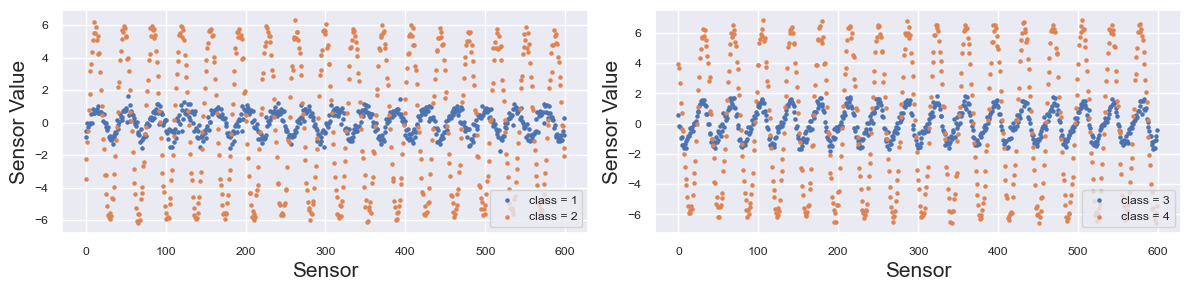

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))

axes[0].scatter(range(0, 600), normal_['s1'][:600], label="class = 1", marker='o', s=5)
axes[0].scatter(range(0, 600), type1_['s1'][:600], label="class = 2", marker='o', s=5)
axes[0].legend(loc="lower right")
axes[0].set_xlabel("Sensor", fontsize=15)
axes[0].set_ylabel("Sensor Value", fontsize=15)

axes[1].scatter(range(0, 600), type2_['s1'][:600], label="class = 3", marker='o', s=5)
axes[1].scatter(range(0, 600), type3_['s1'][:600], label="class = 4", marker='o', s=5)
axes[1].legend(loc="lower right")
axes[1].set_xlabel("Sensor", fontsize=15)
axes[1].set_ylabel("Sensor Value", fontsize=15)

plt.tight_layout()

plt.show()

<Axes: >

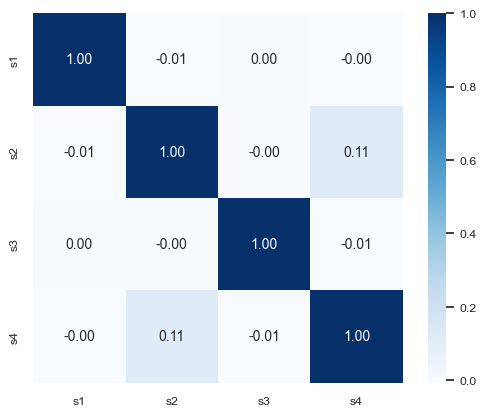

In [40]:
# data correlation
names = ['s1','s2','s3','s4']
cm = np.corrcoef(normal_[names].values.T)
sns.set(font_scale=0.8)
sns.heatmap(cm, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
yticklabels=names, xticklabels=names, cmap=plt.cm.Blues)

##### 2.2. Moving Average Filter
- To reduce the effect of noise

In [48]:
M = 15

# meaning of valid : 두 배열이 완전히 겹칠때만 수행
normal_s1 = np.convolve(normal_['s1'], np.ones(M), 'valid') / M;    normal_s1 = normal_s1.reshape(len(normal_s1),1)
normal_s2 = np.convolve(normal_['s2'], np.ones(M), 'valid') / M;    normal_s2 = normal_s2.reshape(len(normal_s2),1)
normal_s3 = np.convolve(normal_['s3'], np.ones(M), 'valid') / M;    normal_s3 = normal_s3.reshape(len(normal_s3),1)
normal_s4 = np.convolve(normal_['s4'], np.ones(M), 'valid') / M;    normal_s4 = normal_s4.reshape(len(normal_s4),1)

type1_s1 = np.convolve(type1_['s1'], np.ones(M), 'valid') / M;  type1_s1 = type1_s1.reshape(len(type1_s1),1)
type1_s2 = np.convolve(type1_['s2'], np.ones(M), 'valid') / M;  type1_s2 = type1_s2.reshape(len(type1_s2),1)
type1_s3 = np.convolve(type1_['s3'], np.ones(M), 'valid') / M;  type1_s3 = type1_s3.reshape(len(type1_s3),1)
type1_s4 = np.convolve(type1_['s4'], np.ones(M), 'valid') / M;  type1_s4 = type1_s4.reshape(len(type1_s4),1)

type2_s1 = np.convolve(type2_['s1'], np.ones(M), 'valid') / M;  type2_s1 = type2_s1.reshape(len(type2_s1),1)
type2_s2 = np.convolve(type2_['s2'], np.ones(M), 'valid') / M;  type2_s2 = type2_s2.reshape(len(type2_s2),1)
type2_s3 = np.convolve(type2_['s3'], np.ones(M), 'valid') / M;  type2_s3 = type2_s3.reshape(len(type2_s3),1)
type2_s4 = np.convolve(type2_['s4'], np.ones(M), 'valid') / M;  type2_s4 = type2_s4.reshape(len(type2_s4),1)

type3_s1 = np.convolve(type3_['s1'], np.ones(M), 'valid') / M;  type3_s1 = type3_s1.reshape(len(type3_s1),1)
type3_s2 = np.convolve(type3_['s2'], np.ones(M), 'valid') / M;  type3_s2 = type3_s2.reshape(len(type3_s2),1)
type3_s3 = np.convolve(type3_['s3'], np.ones(M), 'valid') / M;  type3_s3 = type3_s3.reshape(len(type3_s3),1)
type3_s4 = np.convolve(type3_['s4'], np.ones(M), 'valid') / M;  type3_s4 = type3_s4.reshape(len(type3_s4),1)

# 같은 class들끼리 arrange
normal_temp = np.concatenate((normal_s1, normal_s2, normal_s3, normal_s4), axis =1)
type1_temp  = np.concatenate((type1_s1, type1_s2, type1_s3, type1_s4), axis =1)
type2_temp  = np.concatenate((type2_s1, type2_s2, type2_s3, type2_s4), axis =1)
type3_temp  = np.concatenate((type3_s1, type3_s2, type3_s3, type3_s4), axis =1)

#### 2.3. Min-Max scaler

In [42]:
scaler = MinMaxScaler()
scaler.fit(normal_)
normal = scaler.transform(normal_temp)
type1  = scaler.transform(type1_temp)
type2  = scaler.transform(type2_temp)
type3  = scaler.transform(type3_temp)

c:\Users\hanmu\anaconda3\envs\py39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\hanmu\anaconda3\envs\py39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\hanmu\anaconda3\envs\py39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\hanmu\anaconda3\envs\py39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


#### 2.4. Pre-processed data

In [44]:
print(normal)
print('------------------------------------------------')
print('normal data size = ', normal.shape)

[[0.57598822 0.50553898 0.56439491 0.44551164]
 [0.60960317 0.50513674 0.58169332 0.44848001]
 [0.62990663 0.5047345  0.59547186 0.46260474]
 ...
 [0.51874981 0.50106998 0.60999194 0.50715712]
 [0.49713039 0.51588928 0.6074125  0.53093987]
 [0.45708747 0.52025039 0.60349765 0.53976513]]
------------------------------------------------
normal data size =  (139986, 4)


In [45]:
# steady - state data acquisition
normal = normal[30000:130000][:]
type1  = type1[30000:130000][:]
type2  = type2[30000:130000][:]
type3  = type3[30000:130000][:]

In [46]:
# data split
# proportion : [train : validation : test] = 6 : 2 : 2
normal_train  =  normal[:][:60000];   normal_valid = normal[:][60000:80000]; normal_test = normal[:][80000:]
type1_train   =  type1[:][:60000];    type1_valid = type1[:][60000:80000];   type1_test  = type1[:][80000:]
type2_train   =  type2[:][:60000];    type2_valid = type2[:][60000:80000];   type2_test  = type2[:][80000:]
type3_train   =  type3[:][:60000];    type3_valid = type3[:][60000:80000];   type3_test  = type3[:][80000:]
train         =  np.concatenate((normal_train, type1_train, type2_train, type3_train))
valid         =  np.concatenate((normal_valid, type1_valid, type2_valid, type3_valid))
test          =  np.concatenate((normal_test, type1_test, type2_test, type3_test))

print("train data의 형태:", train.shape)
print("valid data의 형태:", valid.shape)
print(" test data의 형태:", test.shape)

train data의 형태: (240000, 4)
valid data의 형태: (80000, 4)
 test data의 형태: (80000, 4)


#### 2.5. Data labeling

In [49]:
train_label = np.concatenate((np.full((60000,1),0), np.full((60000,1),1), np.full((60000,1),2), np.full((60000,1),3)))
valid_label = np.concatenate((np.full((20000,1),0), np.full((20000,1),1), np.full((20000,1),2), np.full((20000,1),3)))
test_label  = np.concatenate((np.full((20000,1),0), np.full((20000,1),1), np.full((20000,1),2), np.full((20000,1),3)))

In [51]:
# data shuffle
idx = np.arange(train.shape[0]); np.random.shuffle(idx)
train = train[:][idx]; train_label = train_label[:][idx]

idx_v = np.arange(valid.shape[0]); np.random.shuffle(idx_v)
valid = valid[:][idx_v]; valid_label = valid_label[:][idx_v]

idx_t = np.arange(test.shape[0]); np.random.shuffle(idx_t)
test = test[:][idx_t]; test_label = test_label[:][idx_t]

### 3. Model training
- Pytorch 머신러닝 모듈 : tensor 형태의 데이터를 입력으로 받기 때문에, 데이터의 형태를 array에서 tensor로 변환

In [57]:
x_train = torch.from_numpy(train).float()
y_train = torch.from_numpy(train_label).float().T[0]
x_valid = torch.from_numpy(valid).float()
y_valid = torch.from_numpy(valid_label).float().T[0]
x_test = torch.from_numpy(test).float()
y_test = torch.from_numpy(test_label).float().T[0]